In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [2]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

In [3]:
print(train_features.shape)
print(test_features.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

In [5]:
num_classes = 10
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

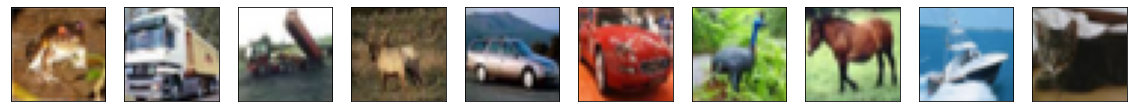

In [6]:
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_features[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

## Build the model

In [7]:
alpha = 0.02

model = keras.Sequential()

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(train_features.shape[1:])))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
model.add(layers.LeakyReLU(alpha=alpha))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(512))
model.add(layers.LeakyReLU(alpha=alpha))

model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          1

In [8]:
my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=5)]

model.fit(train_features, train_labels, validation_split=0.2, epochs=50, batch_size=128, callbacks = my_callbacks, verbose=1)

Epoch 1/50
313/313 [==============================] - 13s 40ms/step - loss: 1.6178 - accuracy: 0.4192 - val_loss: 1.3734 - val_accuracy: 0.5121
Epoch 2/50
313/313 [==============================] - 13s 42ms/step - loss: 1.2439 - accuracy: 0.5582 - val_loss: 1.1817 - val_accuracy: 0.5865
Epoch 3/50
313/313 [==============================] - 15s 48ms/step - loss: 1.0827 - accuracy: 0.6179 - val_loss: 1.0416 - val_accuracy: 0.6313
Epoch 4/50
313/313 [==============================] - 16s 51ms/step - loss: 0.9636 - accuracy: 0.6616 - val_loss: 1.0004 - val_accuracy: 0.6450
Epoch 5/50
313/313 [==============================] - 15s 48ms/step - loss: 0.8696 - accuracy: 0.6956 - val_loss: 0.9287 - val_accuracy: 0.6793
Epoch 6/50
313/313 [==============================] - 15s 48ms/step - loss: 0.7843 - accuracy: 0.7253 - val_loss: 0.8771 - val_accuracy: 0.6991
Epoch 7/50
313/313 [==============================] - 15s 47ms/step - loss: 0.7192 - accuracy: 0.7505 - val_loss: 0.9477 - val_accuracy:

In [9]:
score = model.evaluate(test_features, test_labels, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 1.1543138027191162
Test accuracy: 0.694599986076355
